In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Step 1: Read the CSV file
df = pd.read_csv("encoded_housing_data.csv")

# Step 2: Define features (X) and target (y)
X = df.drop(columns=["price"])
y = df["price"]

# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Optional: Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Optional: Evaluate on test set
score = model.score(X_test_scaled, y_test)
print("R² score on test set:", score)


Coefficients: [ 6.36296059e+04  3.61450854e+02  5.72292410e+02 -2.25392659e+02
 -3.90670049e+02 -3.89372741e+03  6.30453545e+04  2.67370468e+03
 -2.52869415e+03 -3.55370111e+01  7.75660691e+03  1.21262291e+02
  3.76714191e+02 -1.34282580e+03  1.41356096e+03 -2.45350205e+03
 -2.82398590e+03  2.00286853e+03  3.60961132e+03 -4.67489309e+02
 -1.80350413e+03 -1.27719777e+03 -6.26934843e+02]
Intercept: 119367.82347729268
R² score on test set: 0.8761996037161336


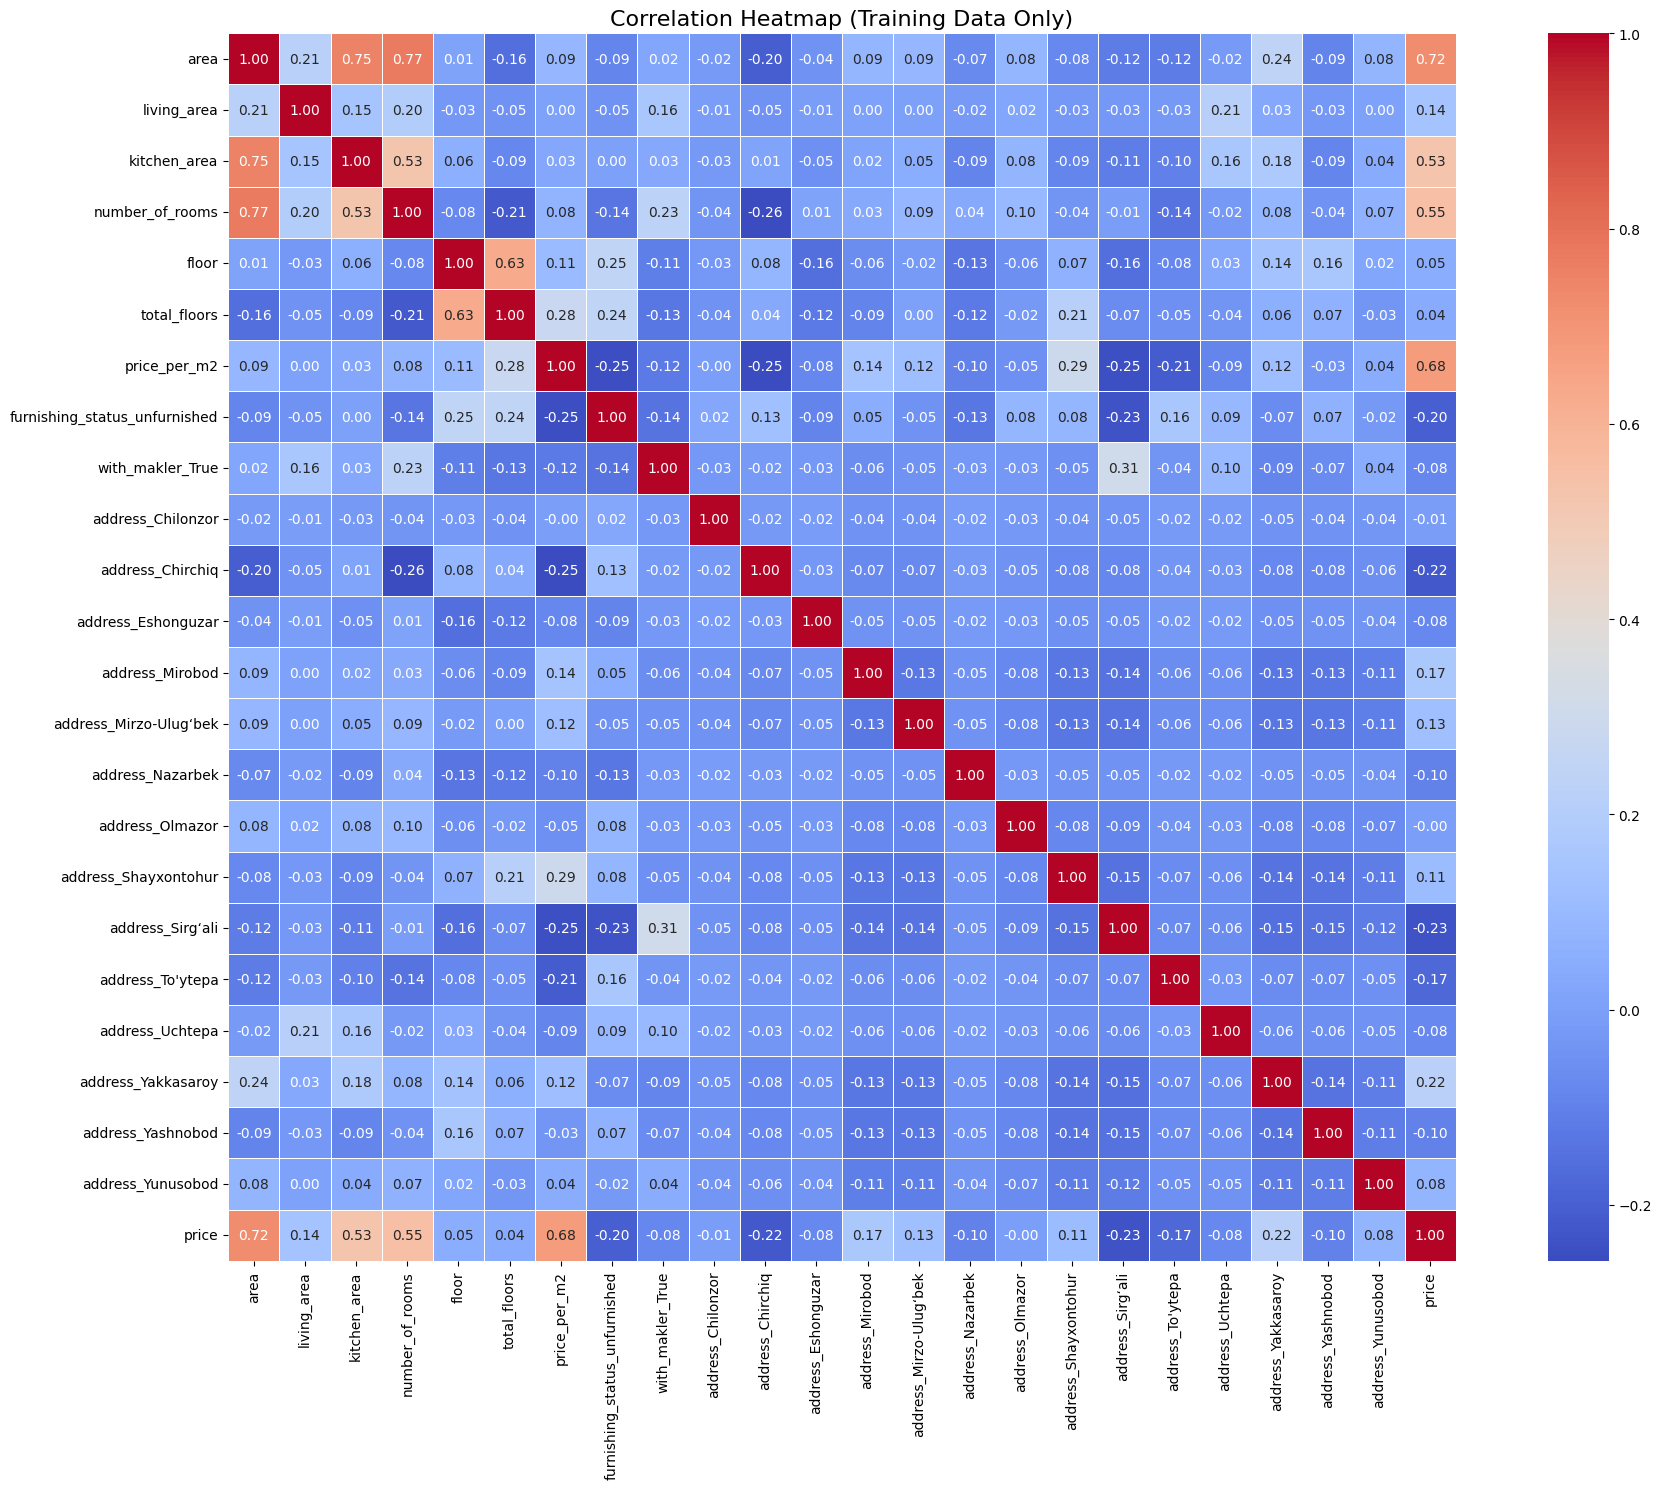

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Combine X_train and y_train
train_data = pd.DataFrame(X_train, columns=X.columns)
train_data['price'] = y_train.values  # add target column

# Step 2: Compute correlation matrix
corr_matrix = train_data.corr(numeric_only=True)

# Step 3: Plot heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Training Data Only)", fontsize=16)
plt.tight_layout()
plt.show()